In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('data/netflix_titles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Remove missing/NaN values from the dataframe

In [36]:
df.isna().sum()
df = df.dropna()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
genres          0
dtype: int64

In [5]:
df['listed_in'].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

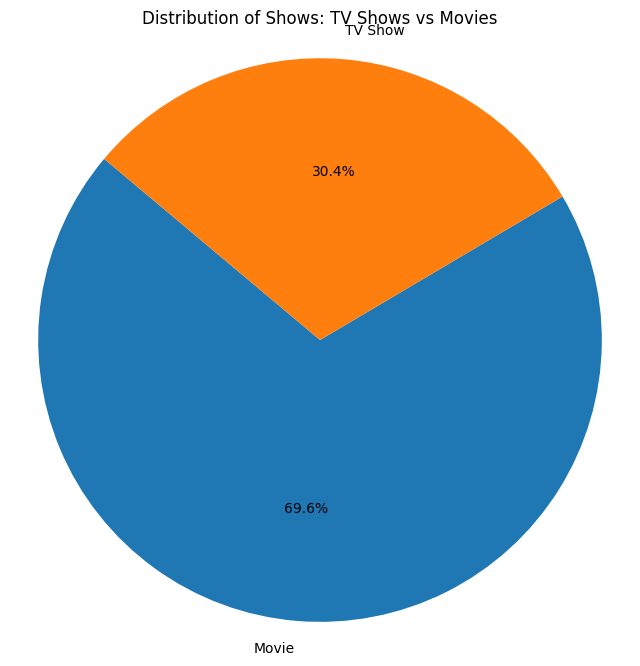

In [6]:
show_counts = df['type'].value_counts()

# Data for the pie chart
labels = show_counts.index
sizes = show_counts.values

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Shows: TV Shows vs Movies')
plt.show()

In [7]:
df['type'].value_counts().index

Index(['Movie', 'TV Show'], dtype='object', name='type')

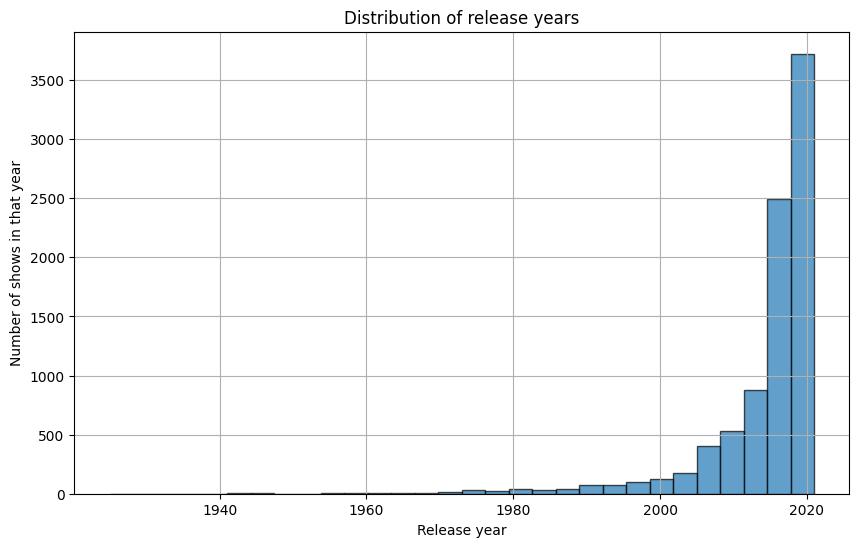

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['release_year'],bins=30, edgecolor = 'black', alpha = 0.7)
plt.ylabel('Number of shows in that year')
plt.xlabel('Release year')
plt.title('Distribution of release years')
plt.grid(True)
plt.show()

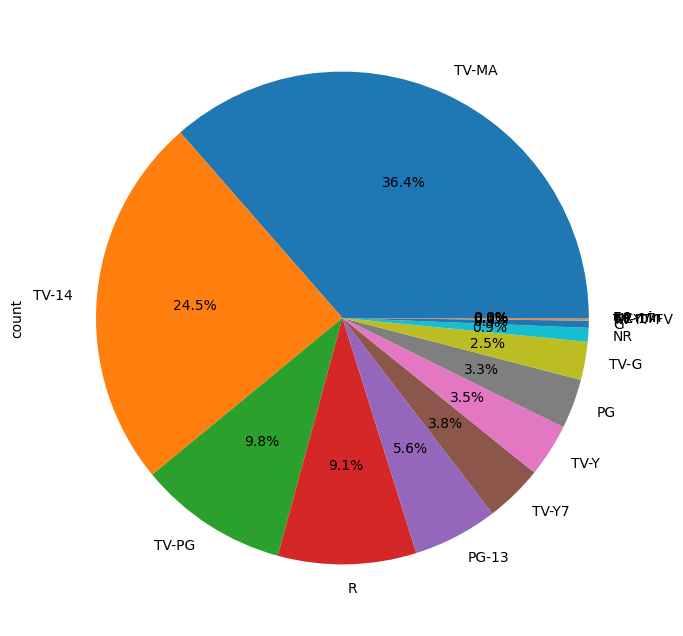

In [20]:
# df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,figsize=(10,8))
df['rating'].value_counts().plot(kind='pie', autopct = '%1.1f%%',figsize=(10,8))
plt.show()

### Count and visualize the distribution of different genres.

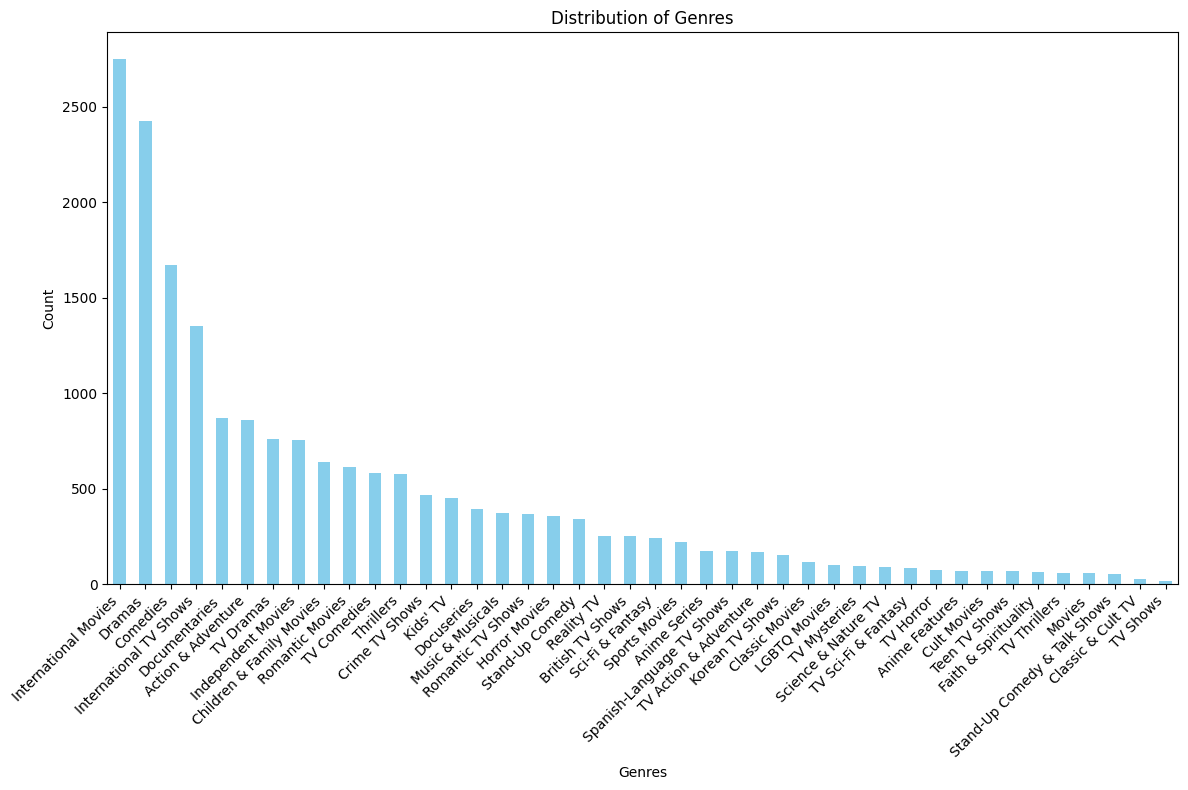

In [29]:
df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))

# Create a list of all genres
all_genres = [genre for sublist in df['genres'] for genre in sublist]

genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align the labels
plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

### Top 10 directors by the number of shows/movies.

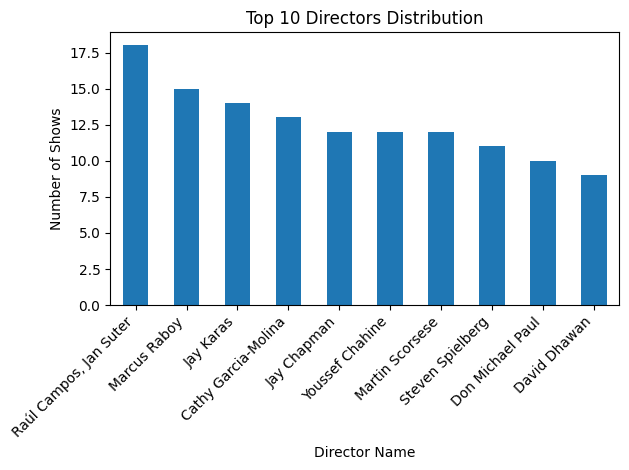

In [80]:
directors = df.groupby('director').size()
top_dir = directors.sort_values(ascending=False).head(10)
# top_dir.plot(kind='bar',title='Top 10 Directors distribution', xlabel='Director name', ylabel='Number of shows')
ax = top_dir.plot(kind='bar', )
plt.xlabel('Director Name')
plt.ylabel('Number of Shows')
plt.title('Top 10 Directors Distribution')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.tight_layout()
plt.show()


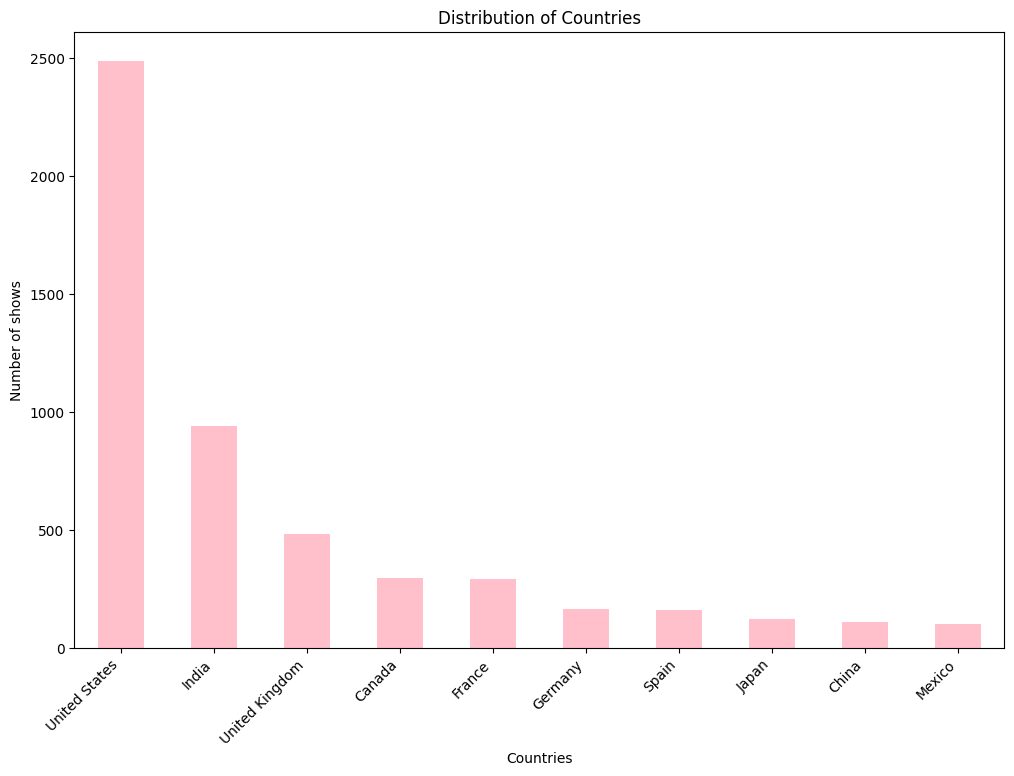

In [62]:
df['countries'] = df['country'].apply(lambda x: x.split(', '))

# Create a list of all countries
all_countries = [country for sublist in df['countries'] for country in sublist]

# Count the occurrences of each country
country_counts = pd.Series(all_countries).value_counts().head(10)

# Plotting the country counts
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='pink')
plt.xlabel('Countries')
plt.ylabel('Number of shows')
plt.title('Distribution of Countries')
plt.xticks(rotation=45, ha='right', fontsize=10)  
# plt.tight_layout()  
plt.show()

Text(0, 0.5, 'Number of shows')

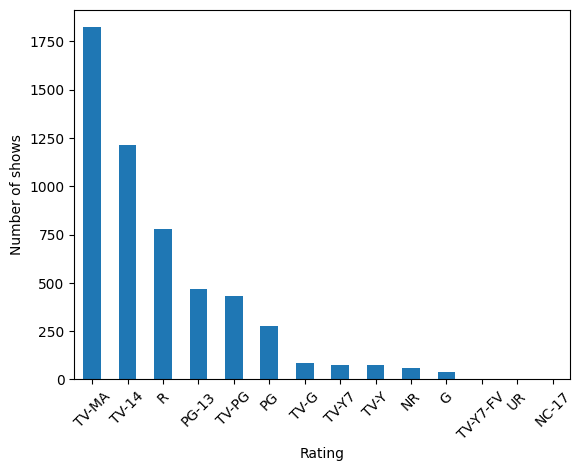

In [79]:
df['rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.xticks(rotation = 45)
plt.ylabel('Number of shows')

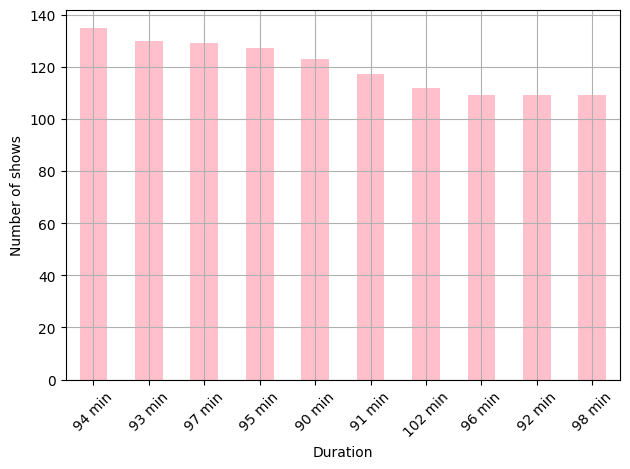

In [81]:
df['duration'].value_counts().head(10).plot(kind='bar',color='pink')
plt.xlabel('Duration')
plt.ylabel('Number of shows')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

In [87]:
df['date_added'].head(10)

7     September 24, 2021
8     September 24, 2021
9     September 24, 2021
12    September 23, 2021
24    September 21, 2021
27    September 20, 2021
28    September 19, 2021
29    September 19, 2021
38    September 16, 2021
41    September 16, 2021
Name: date_added, dtype: object

In [100]:
dates = df['date_added']
dates = [d.lstrip() for d in dates] # removing leading spaces in the dates
new_dates = list(map(lambda x: datetime.strptime(x,'%B %d, %Y'), dates))
new_dates[0].month
df['date_added'] = new_dates # change the date_added datetime format
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,countries
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","[Dramas, Independent Movies, International Mov...","[United States, Ghana, Burkina Faso, United Ki..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,"[British TV Shows, Reality TV]",[United Kingdom]
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,"[Comedies, Dramas]",[United States]
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,"[Dramas, International Movies]","[Germany, Czech Republic]"
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,"[Comedies, International Movies, Romantic Movies]",[India]
